## 한국어 분석

### 패키지 import

In [1]:
!pip install konlpy

In [2]:
!pip install wordcloud

In [3]:
import json
import re
from konlpy.tag import Okt
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [4]:
# 크롤링된 데이터 로드
data = json.loads(open('C:/Users/admin/제조 인공지능_naver_news.json', mode='r', encoding='utf-8').read())
data

[{'description': '이번 전시는 컴퓨터 프로그래밍과 <b>인공지능</b> 알고리즘을 통해 시각적으로 변화시킨 풍경 사진 작품을... 작가가 활용한 ‘고전적인’ 컴퓨터 비전 알고리즘은 자율주행차, 산업 <b>제조</b>, 무기 시스템 및 로봇... ',
  'link': 'https://weekly.cnbnews.com/news/article.html?no=147155',
  'originallink': 'https://weekly.cnbnews.com/news/article.html?no=147155',
  'pubDate': '2022-12-06 15:38:00',
  'title': '[천수림의 현대사진산책+] 실재 그 너머의 풍경: 트레버 페글렌×박형렬'},
 {'description': '두 번째 발제자인 임세라 마블러스 대표는 메타버스 스마트팜, 메타버스 커머스(쇼핑) 등 <b>인공지능</b>과... 끝으로 김서규 큐에스 기업부설연구소장은 실제 <b>제조</b>현장의 디지털 전환은 공정마다 상이한 가이드라인이 제공돼... ',
  'link': 'https://ilyo.co.kr/?ac=article_view&entry_id=442132',
  'originallink': 'https://ilyo.co.kr/?ac=article_view&entry_id=442132',
  'pubDate': '2022-12-06 15:38:00',
  'title': '경북도, 민간기업과 메타버스 시대 주도 나서'},
 {'description': '<b>제조</b>데이터 기반 서비타이제이션 공모전서는 아이티공간 등 4개 팀 수상 아주경제=조재형 기자 grind@ajunews.com 중소벤처기업부는 6일 서울 서초구 aT센터에서 ‘제2회 K-<b>인공지능</b> <b>제조</b>데이터 분석 경진대회’ 시상식을... ',
  'link': 'https://www.ajunews.com/view/20221206153146304',
  'originallink'

In [6]:
# data['message'] 에서 명사 단어만 추출하기
# 1 - 단어가 아닌 것들은 치환하도록
title = ''
for item in data:
    title = title + re.sub(r'[^\w]', ' ', item['title'])

title

' 천수림의 현대사진산책   실재 그 너머의 풍경  트레버 페글렌 박형렬경북도  민간기업과 메타버스 시대 주도 나서중기부   b 제조  b 데이터 활용 경진대회 중앙대팀 등 8개팀 수상경상북도   메타버스 이니셔티브 경북포럼  개최중기부  K  b 인공지능  b   b 제조  b 데이터 분석 경진대회  시상식 개최삼성전자 네이버  차세대 AI 반도체 솔루션 개발 MOU 반도체 SW 전문가 힘   삼성 네이버  AI 반도체  apos 연합전선 apos  SKT  apos 사피온 apos 과 경쟁하나교묘해지는 랜섬웨어  슈퍼앱 무인화기기 공격도 유의해야韓 베트남 기업인  quot 향후 30년  디지털 그린에너지 협력 quot 의료용 대마 시장 확대 치료제 개발도 진화혁신모델 개발 중앙대팀 등 수상  apos  b 제조  b 데이터 분석 경진대회 apos 2022 아이디어 해커톤 경진대회   b 지능  b 형 곤충 스마트팜 데이터부문 시상식 가    quot AI가 미래 핵심 동력 quot    현대重그룹  서울대와 AI 포럼 개최경북도  민간기업과 메타버스 시대 주도 나서 quot  b 제조  b  중소기업 도약 quot  중기부  데이터 AI 활용방안 제시 quot 초거대 AI 전용 반도체 만들자 quot  삼성전자 네이버  손잡고 솔루션 개발중앙대 팀  apos 케이 K   b 인공지능  b   b 제조  b 데이터 분석 경진대회 apos 서 대상 수상경북도  민간기업과 함께 메타버스 융합산업 활성화 모색계명대 학생들  슬로바키아 현지에서 캡스톤디자인 실력 펼쳐삼성전자 네이버  AI 반도체 솔루션 개발  apos 맞손 apos 삼성전자  네이버 손잡고  AI 반도체 솔루션  만든다 국내 최대  플랫폼  b 제조  b  기업  AI 반도체로 뭉쳤다짙어지는 랜섬웨어 그림자 SK쉴더스  quot 복호화 불가능한 수준 quot SK쉴더스  quot 내년에도 랜섬웨어 감염 주의 갈수록  b 지능  b 화 quot 정기선 HD현대 사장  현대重 새 50년 핵심동력은 AI

In [7]:
# 2 - 명사만 추출
nlp = Okt()
title_noun = nlp.nouns(title)
title_noun

['수림',
 '현대',
 '사진',
 '산책',
 '실재',
 '그',
 '너머',
 '풍경',
 '트',
 '레버',
 '페글렌',
 '박',
 '렬',
 '경북',
 '민간',
 '기업',
 '메타',
 '버스',
 '시대',
 '주도',
 '중',
 '기부',
 '제조',
 '데이터',
 '활용',
 '경진',
 '대회',
 '중앙대',
 '팀',
 '등',
 '개팀',
 '수상',
 '경상북도',
 '메타',
 '버스',
 '이니셔티브',
 '경북',
 '포럼',
 '개최',
 '기부',
 '인공',
 '지능',
 '제조',
 '데이터',
 '분석',
 '경진',
 '대회',
 '시상식',
 '개최',
 '삼성',
 '전자',
 '네이버',
 '차세대',
 '반도체',
 '솔루션',
 '개발',
 '반도체',
 '전문가',
 '힘',
 '삼성',
 '네이버',
 '반도체',
 '연합전선',
 '피온',
 '과',
 '경쟁',
 '랜섬',
 '웨어',
 '슈퍼',
 '앱',
 '무인',
 '기기',
 '공격',
 '유의',
 '베트남',
 '기업인',
 '향후',
 '디지털',
 '그린',
 '에너지',
 '협력',
 '의료',
 '용',
 '대마',
 '시장',
 '확대',
 '치료',
 '제',
 '개발',
 '진화',
 '혁신',
 '모델',
 '개발',
 '중앙대',
 '팀',
 '등',
 '수상',
 '제조',
 '데이터',
 '분석',
 '경진',
 '대회',
 '아이디어',
 '해커',
 '톤',
 '경진',
 '대회',
 '지능',
 '형',
 '곤충',
 '스마트',
 '데이터',
 '부문',
 '시상식',
 '미래',
 '핵심',
 '동력',
 '현대',
 '그룹',
 '서울대',
 '포럼',
 '개최',
 '경북',
 '민간',
 '기업',
 '메타',
 '버스',
 '시대',
 '주도',
 '제조',
 '중소기업',
 '도약',
 '중',
 '기부',
 '데이터',
 '활용',
 '방안',
 '제시',
 '초',
 '거대',
 '전

#### 추출한 단어로 검색

In [8]:
count = Counter(title_noun)
count

Counter({'수림': 1,
         '현대': 99,
         '사진': 1,
         '산책': 4,
         '실재': 1,
         '그': 4,
         '너머': 1,
         '풍경': 3,
         '트': 2,
         '레버': 1,
         '페글렌': 1,
         '박': 3,
         '렬': 1,
         '경북': 56,
         '민간': 5,
         '기업': 152,
         '메타': 20,
         '버스': 23,
         '시대': 43,
         '주도': 15,
         '중': 39,
         '기부': 31,
         '제조': 209,
         '데이터': 51,
         '활용': 28,
         '경진': 22,
         '대회': 33,
         '중앙대': 3,
         '팀': 46,
         '등': 71,
         '개팀': 4,
         '수상': 25,
         '경상북도': 3,
         '이니셔티브': 3,
         '포럼': 85,
         '개최': 201,
         '인공': 78,
         '지능': 109,
         '분석': 25,
         '시상식': 8,
         '삼성': 297,
         '전자': 315,
         '네이버': 226,
         '차세대': 59,
         '반도체': 252,
         '솔루션': 368,
         '개발': 285,
         '전문가': 10,
         '힘': 17,
         '연합전선': 2,
         '피온': 2,
         '과': 12,
         '경쟁': 

In [9]:
word_count = dict()

for tag, counts in count.most_common(30):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print(f'{tag} : {counts}')

스마트 : 443
솔루션 : 368
전자 : 315
산업 : 304
삼성 : 297
개발 : 285
반도체 : 252
혁신 : 234
기술 : 231
사업 : 227
네이버 : 226
디지털 : 218
제조 : 209
개최 : 201
미래 : 185
협력 : 180
한국 : 166
기반 : 158
자율 : 158
기업 : 152
이재용 : 150
전환 : 135
로봇 : 131
공장 : 127
재해 : 126
유플러스 : 120
중대 : 120
그룹 : 118


In [32]:
print(word_count)

{'스마트': 443, '솔루션': 368, '전자': 315, '산업': 304, '삼성': 297, '개발': 285, '반도체': 252, '혁신': 234, '기술': 231, '사업': 227, '네이버': 226, '디지털': 218, '제조': 209, '개최': 201, '미래': 185, '협력': 180, '한국': 166, '기반': 158, '자율': 158, '기업': 152, '이재용': 150, '전환': 135, '로봇': 131, '공장': 127, '재해': 126, '유플러스': 120, '중대': 120, '그룹': 118}


#### 한글 폰트 설정

In [22]:
font_path = 'C:/Windows/Fonts/H2GTRE.TTF'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

#### 키워드 빈도수 Bar차트

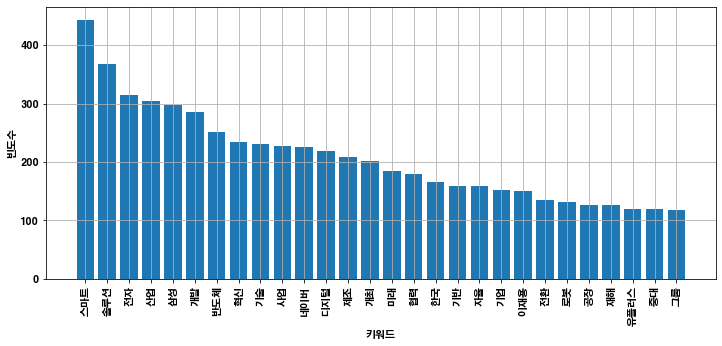

In [23]:
plt.figure(figsize=(12, 5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=90)

plt.show()

#### 한글 워드클라우드

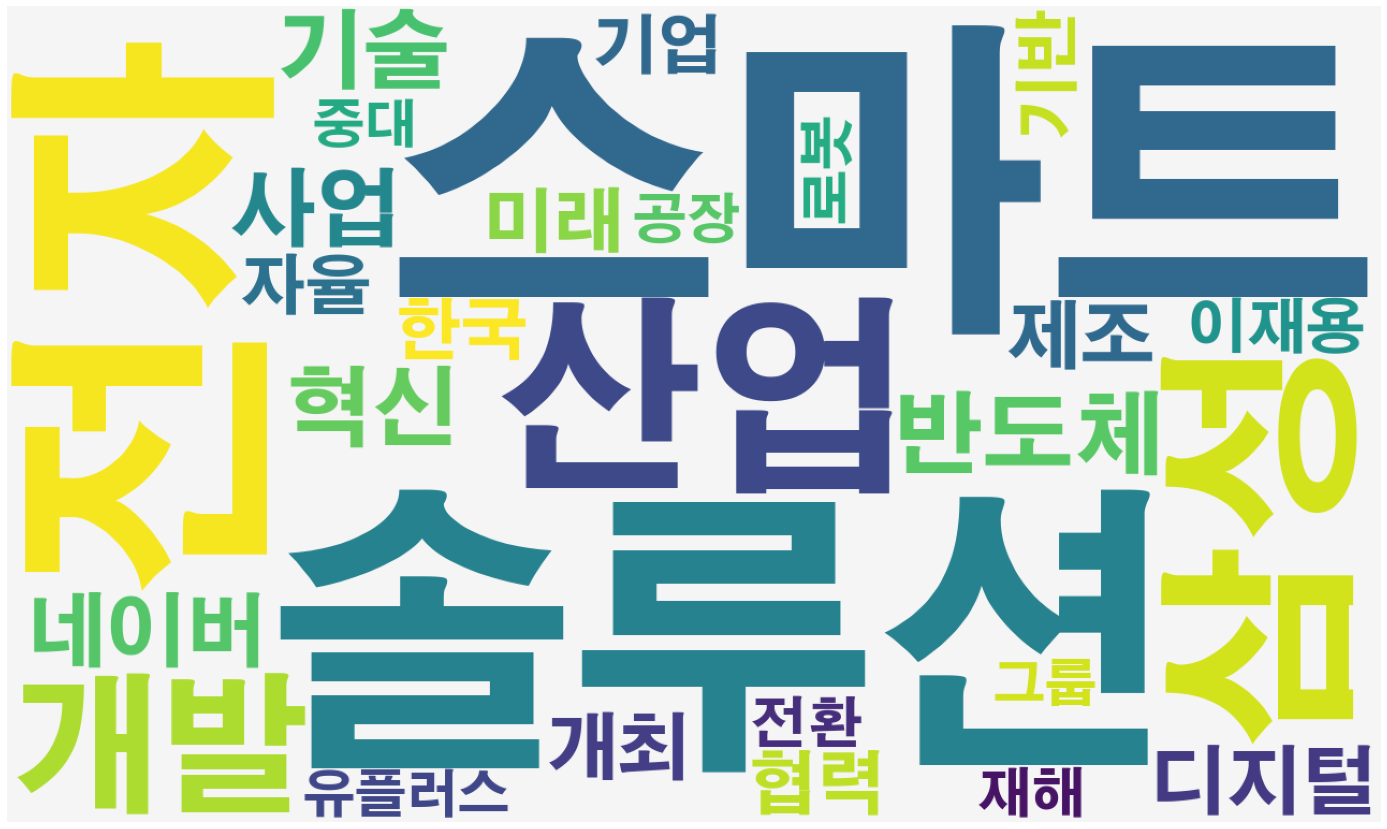

In [24]:
wc = WordCloud(font_path=font_path, background_color='#f5f5f5', width=1280, height=760)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(40, 15))
plt.imshow(cloud)
plt.axis('off')

plt.show()

In [20]:
cloud.to_file('./data/facebook_etnews_wordcloud.png')